# Wine quality

### Importing necessary stuff

In [1]:
import pandas as pd
#from pylab import *
import matplotlib.pyplot as plot

### Get data into dataframe

In [4]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url, header = 0, sep = ";")

### First look at the data

In [6]:
summary = wine.describe()
print(wine.head())
print(summary)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

### Quartiles boxplot

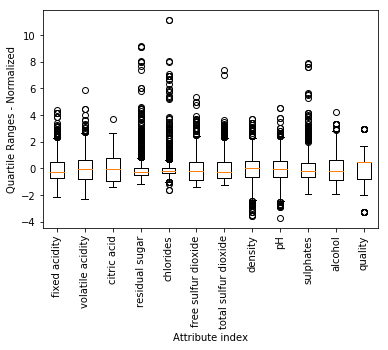

In [25]:
wineNormalized = wine.copy()
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    
    wineNormalized.iloc[:, i:(i + 1)] = (wineNormalized.iloc[:, i:(i + 1)] - mean) /sd
    
array = wineNormalized.values
plot.boxplot(array)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.xlabel("Attributes")
plot.ylabel("Quartile Ranges - Normalized")
show()

### Parallel coordinates plot (unnormalized vs normalized)

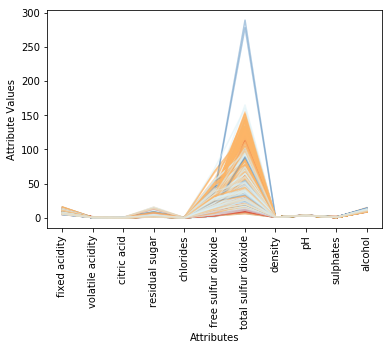

In [32]:
nrows = len(wine.index)
tasteCol = len(summary.columns)

meanTaste = summary.iloc[1, tasteCol - 1]
sdTaste = summary.iloc[2, tasteCol - 1]
nDataCol = len(wine.columns) - 1

for i in range(nrows):
    dataRow = wine.iloc[i, 0:nDataCol]
    normTarget = (wine.iloc[i, nDataCol] - meanTaste) / sdTaste
    labelColor = 1.0 / (1.0 + exp(-normTarget))
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.5)
    
plot.xlabel("Attributes")
plot.ylabel("Attribute Values")
plot.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[:-1], rotation = 'vertical')
show()

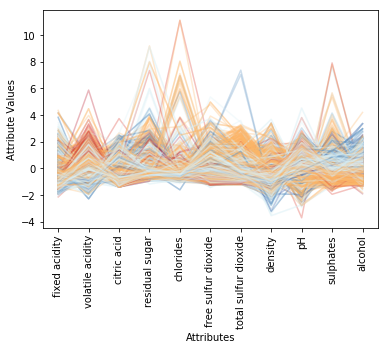

In [42]:
for i in range(nrows):
    dataRow = wineNormalized.iloc[i, 0:nDataCol]
    normTarget = wineNormalized.iloc[i, nDataCol]
    labelColor = 1.0 / (1.0 + exp(-normTarget))
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.3)

plot.xlabel("Attributes")
plot.ylabel("Attribute Values")
plot.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[:-1], rotation = 'vertical')
show()

### Correlation heat map

In [36]:
corMat = pd.DataFrame(wine.corr())
print(corMat)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

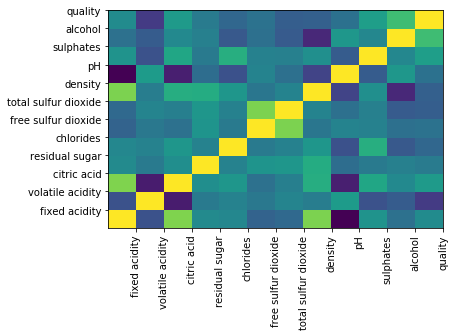

In [40]:
plot.pcolor(corMat)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.yticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'horizontal')
plot.show()